In [71]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd 
from scipy import optimize

def bisec(f,a,b,tol): #Método de Bisección
  if f(a)*f(b)<0: #f debe tocar el eje x
    p=(a+b)/2 #Punto medio
    i=0 #Iniciar
    while abs(f(p))>tol:
      if f(a)*f(p)<0:
        b=p
      elif f(b)*f(p)<0:
        a=p
            
        
      i=i+1 #Parar
      p=(a+b)/2 #Tomar otro p
    x=np.linspace(a-1,b+1,100)
    plt.plot(x,f(x),label="$f(x)$" )
    plt.plot(p,f(p),"o",color="red",label="Raíz")             
    plt.title("Gráfica por método de Bisección")
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.grid()
    plt.legend()
    V={"Raíz por método de bisección":p}   
    return V
        

  else:
    return "HEERRROR" #Error

def NR(f,xo,tol): # Método de Newton 
  i=xo
  while abs(f(i))>tol:
    i=i-f(i)*(1e-7)/(f(i+1e-7)-f(i))
  x=np.linspace(0,i+1,100)
  plt.plot(x,f(x),label='$f(x)$')
  plt.plot(i,f(i),"o",color='red',label="Raíz")
  plt.title("Gráfica por método de Newton")
  plt.xlabel("$x$")
  plt.ylabel("$f(x)$")
  plt.grid()
  plt.legend()
  V={"Raíz por método de Newton":i}
  return V

def punto_fijo(po,f,Nmax): #Punto fijo 
  g=lambda x:f(x)+x
  i=0
  p=po
    
  while i<Nmax:
    p=g(p)
    i+=1
        
  return p

def secante(f,p0,p1,tol): #Método secante
  n=0
  pn_1=p1
  pn_2=p0
  while abs(pn_1-pn_2) > tol:
    pn=pn_1-(f(pn_1)*(pn_1-pn_2))/(f(pn_1)-f(pn_2))
        
    #Descarto    0,1,2....
    pn_2 = pn_1 #1,2,3...
    pn_1 = pn   #2,3,4...
        
    n+=1
        
  #print('Raiz encontrada en',n,'iteraciones')
  return pn

**1)** Encontrar la raíz de $e^x -2=cos(e^x -2)$ 

{'Raíz por método de bisección': -1.0076239705085754}

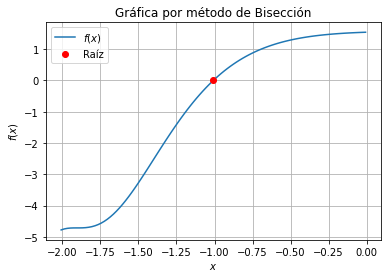

In [39]:
j=lambda x: np.cos(np.exp(-x)-2)+2-np.exp(-x)
bisec(j,-10,10,1e-7)

**2)** Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)
 

{'Raíz por método de bisección': 0.33283667266368866}

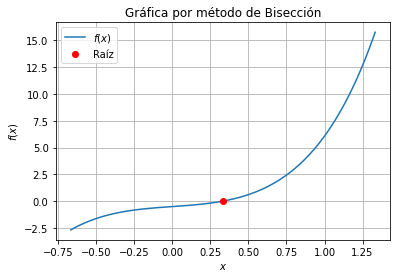

In [40]:
G=lambda w: (9.76/2*w**2)*np.sinh(w)+ np.sin(w)-0.51
bisec(G,-2,1,1e-7)

**3.** Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


{'Raíz por método de bisección': 0.16616606712341309}

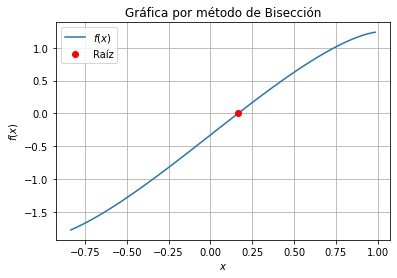

In [52]:
L=10 
r=1 
V=12.4


Z=lambda h: (r**2)*np.arcsin(h/r)+h*(r**2-h**2)**(0.5)+V/L-(0.5)*np.pi*r**2 #Profundidad
bisec(Z,-1,1,1e-7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


{'Raíz por método de Newton': 0.16616598445223288}

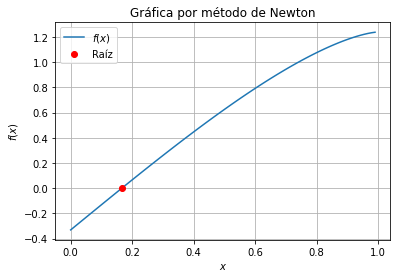

In [55]:
NR(Z,0,1e-7)


**4.** Resolver la siguiente situación


![Ruedas](https://github.com/hernansalinas/Curso_Metodos_Computacionales/blob/main/Tareas/figuras/fig1.png?raw=true)

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden

```
# Tiene formato de código
```



In [57]:
l=89 #pulgadas
h=49 #pulgadas
D=55
beta=11.5 #Grados


A=l*np.sin(np.deg2rad(beta))
B=l*np.cos(np.deg2rad(beta))
C=(h+0.5*D)*np.sin(np.deg2rad(beta))-0.5*D*np.tan(np.deg2rad(beta))
E=(h+0.5*D)*np.cos(np.deg2rad(beta))-0.5*D


F= lambda alpha:A*np.sin(alpha)*np.cos(alpha)+B*(np.sin(alpha))**2-C*np.cos(alpha)-E*np.sin(alpha)

32.972174727630026

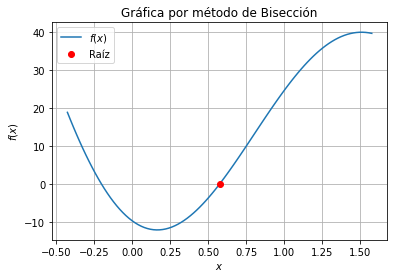

In [58]:
#abs((30-np.rad2deg(bisec(f4,0,2,1e-7)["Raíz por método de bisección"]))/30) #Error relativo
np.rad2deg(bisec(F,0,2,1e-7)["Raíz por método de bisección"])#Pasar a grados

**5.** Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)

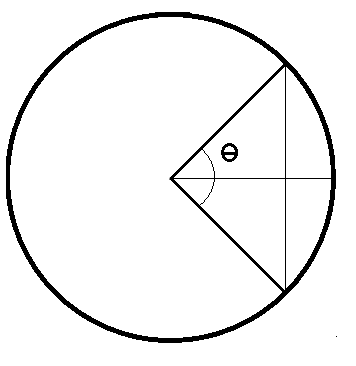 \
\
Área del triangulo $-->$ $A_T = \frac{1}{2}[2r^2sen(\frac{\theta}{2})cos(\frac{\theta}{2})]=\frac{1}{2}r^2sen\theta$ 

\
Área del sector circular $-->$ $A_S = \frac{1}{2}\theta r^2$ 

\
Área del sección transversal $-->$ $A_{ST} = A_S -A_T =\frac{1}{2}\theta r^2 -\frac{1}{2}r^2sen=\frac{\pi r^2}{4}$
\
Resolviendo la ecuación obtenemos $$f(\theta)=\theta - sen(\theta) -\frac{\pi}{2}$$


In [67]:
f=lambda theta:theta-np.sin(theta)-np.pi/2
g:lambda theta: np.sin(theta)+np.pi/2

theta=np.linspace(-2*np.pi,2*np.pi,1000)

In [47]:
df = pd.DataFrame({'theta':theta,'f(theta)':f(theta)})

In [48]:
df #DataFrame theta vs

,theta,f(theta)
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


{'Raíz por método de bisección': 2.30988147854805}

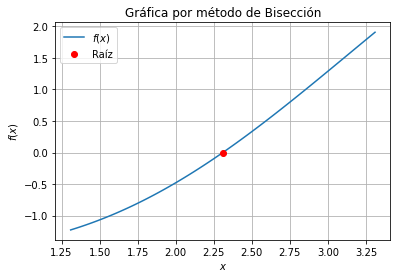

In [61]:
bisec(f,0,3,1e-7)#Raíz más gráfica

{'Raíz por método de Newton': 2.309881466454413}

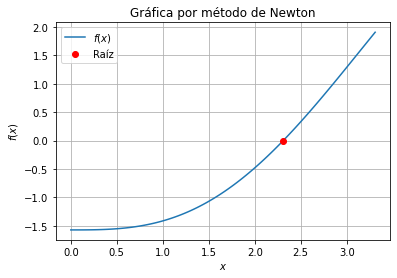

In [60]:
NR(f,1,1e-7) #Newton

In [69]:
optimize.fixed_point(g,2) #Punto fijo

array(1.572608)

In [72]:
secante(f,1,3,1e-7) #Secante

2.3098814600100823